In [80]:
!ln -s ../https_hsts_scraper.py https_hsts_scraper.py

ln: https_hsts_scraper.py: File exists


In [81]:
!ln -s ../https_preload_scraper.py https_preload_scraper.py

ln: https_preload_scraper.py: File exists


In [101]:
from https_hsts_scraper import getHstsHeader
import numpy as np
import pandas as pd
import json 
import matplotlib.pyplot as plt
times = []
names = []  
ranks = [] 
with open("best_domains.json",'r') as file:
    jsonFile = json.load(file)
    for block in jsonFile : 
        name = block["rootDomain"].strip('\n ')
        print(name,end="\t")
        domain = f"https://{name}"
        res =getHstsHeader(domain)
        if res  and res[0].days > 0 : 
            times.append(res[0].days)
            print(res[0].days,end="")
            names.append(name)
            ranks.append( block["rank"])
        print()
            
print(*times)
print(*names)


imdb.com	549
youtube.com	365
www.google.com	error Is not Hsts - Error

microsoft.com	365
linkedin.com	365
apple.com	365
support.google.com	365
play.google.com	365
en.wikipedia.org	1231
cloudflare.com	365
wordpress.org	
mozilla.org	182
yandex.ru	error Is not Hsts - Error

docs.google.com	365
maps.google.com	error Is not Hsts - Error

drive.google.com	365
accounts.google.com	365
adobe.com	error Is not Hsts - Error

googleusercontent.com	error HTTPSConnectionPool(host='googleusercontent.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x1771b2800>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

plus.google.com	365
bp.blogspot.com	error HTTPSConnectionPool(host='bp.blogspot.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x1771b2890>: Failed to establish a new connection: [Errno 8] node

In [124]:
times2 = times[:30]
names2 = names[:30]

In [125]:
df2 = pd.DataFrame([times2], columns=names2)

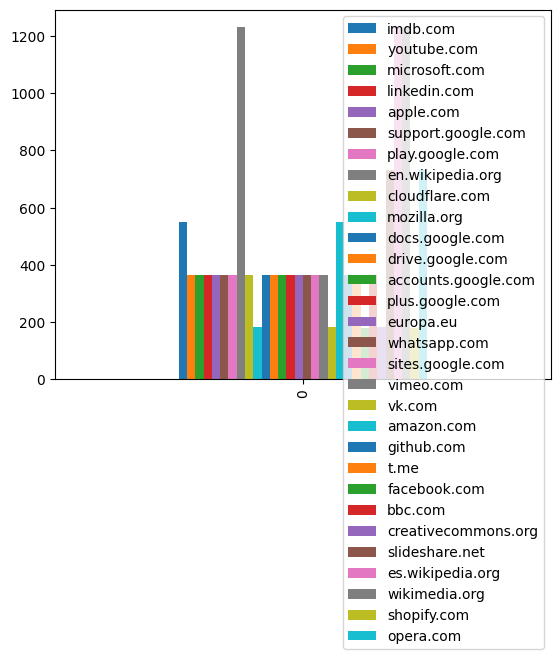

In [126]:
df2.plot.bar();

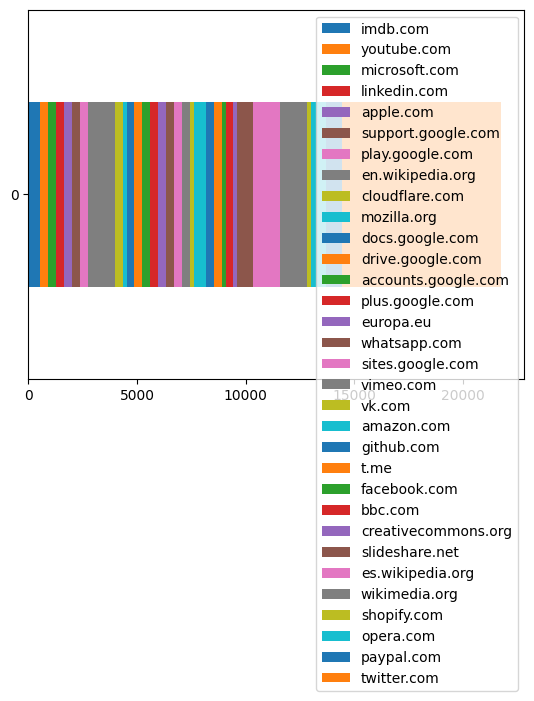

In [111]:
df2.plot.barh(stacked=True);

In [112]:
import https_preload_scraper
resultPre = [] 
namesPre= []
ranksPre =[]  
with open("best_domains.json",'r') as file:
    for block in jsonFile : 
        name = block["rootDomain"].strip('\n ')
        print(name)
        resultPre.append(https_preload_scraper.is_preLoaded(name))
        namesPre.append(name)
        ranksPre.append(block["rank"])
print(list(zip(resultPre,namesPre)))


imdb.com
youtube.com
www.google.com
microsoft.com
linkedin.com
apple.com
support.google.com
play.google.com
en.wikipedia.org
cloudflare.com
wordpress.org
mozilla.org
yandex.ru
docs.google.com
maps.google.com
drive.google.com
accounts.google.com
adobe.com
googleusercontent.com
plus.google.com
bp.blogspot.com
europa.eu
whatsapp.com
sites.google.com
vimeo.com
vk.com
amazon.com
github.com
uol.com.br
t.me
policies.google.com
facebook.com
istockphoto.com
search.google.com
cnn.com
bbc.com
line.me
terra.com.br
creativecommons.org
slideshare.net
brandbucket.com
gstatic.com
es.wikipedia.org
google.com.br
wikimedia.org
shopify.com
globo.com
opera.com
gravatar.com
paypal.com
twitter.com
[(True, 'imdb.com'), (True, 'youtube.com'), (False, 'www.google.com'), (False, 'microsoft.com'), (False, 'linkedin.com'), (False, 'apple.com'), (False, 'support.google.com'), (True, 'play.google.com'), (True, 'en.wikipedia.org'), (True, 'cloudflare.com'), (False, 'wordpress.org'), (False, 'mozilla.org'), (False, 'y

In [116]:
df3 = pd.DataFrame({'is it pre-loaded': [ resultPre.count(True) , resultPre.count(False) ]  ,
                    },
                   index=["pre-loaded","not pre-loaded"])

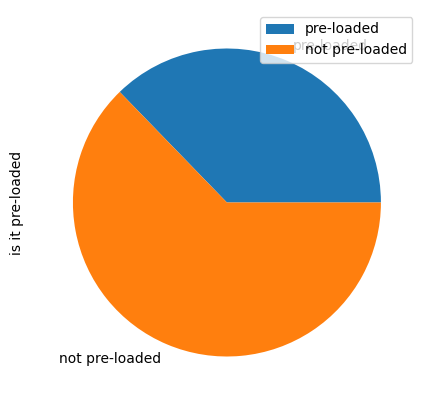

In [118]:
lot = df3.plot.pie(y='is it pre-loaded', figsize=(5, 5))

In [119]:
df4=pd.DataFrame([list(map(lambda x : int(x) + 0.1, resultPre)) ], columns=namesPre)

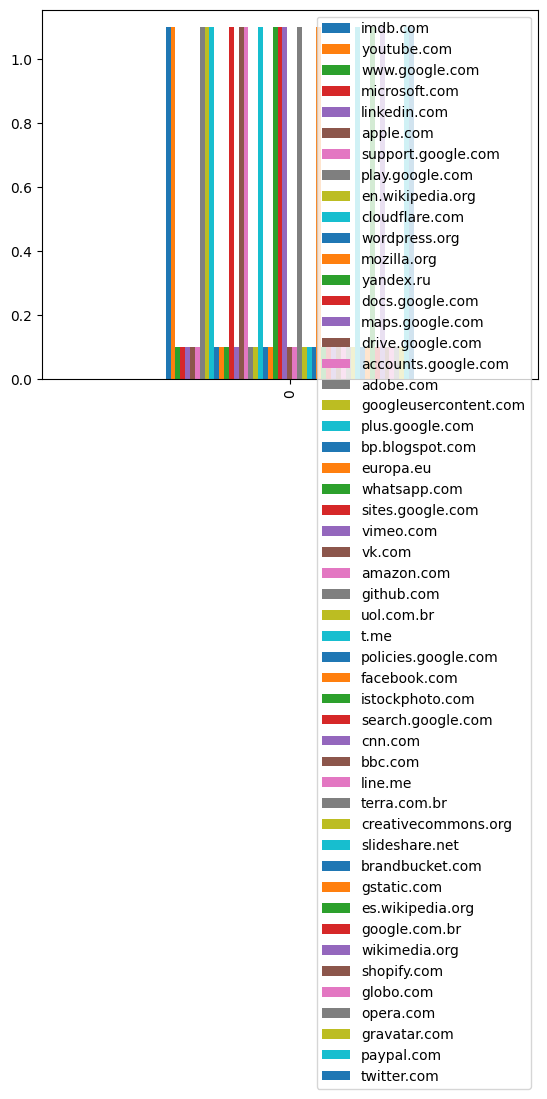

In [120]:

df4.plot.bar();

In [121]:
df5 = pd.DataFrame(map(int,resultPre))

<AxesSubplot: >

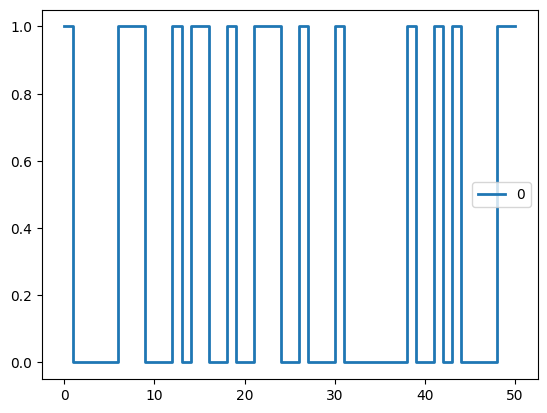

In [122]:
df5.plot(drawstyle="steps", linewidth=2)